In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('/content/car_data.csv')
df.head()


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df.isnull().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [6]:

df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [7]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [8]:
df.Purchased.value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [9]:
df.AnnualSalary.value_counts()

81500     18
73500     17
76500     14
80500     12
62500     12
          ..
94500      1
139000     1
104500     1
117500     1
101000     1
Name: AnnualSalary, Length: 247, dtype: int64

<Axes: >

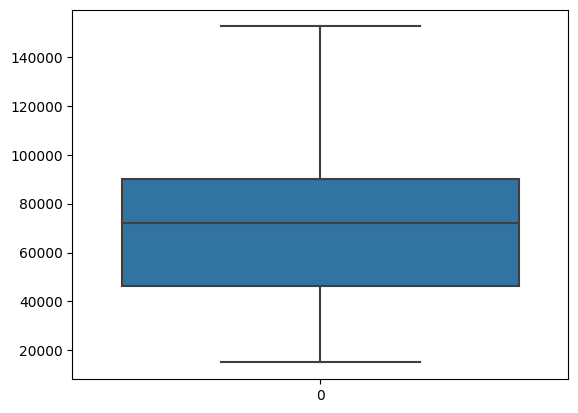

In [10]:

sns.boxplot(df.AnnualSalary)

<Axes: >

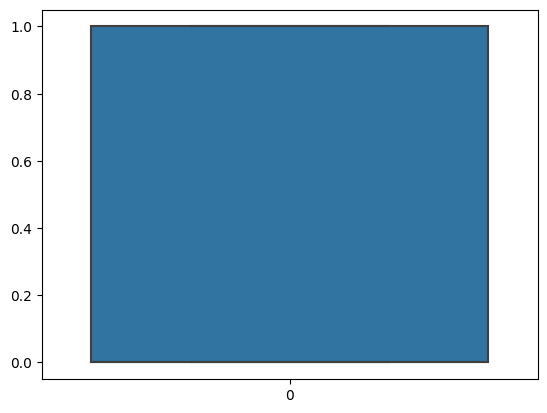

In [11]:
sns.boxplot(df.Purchased)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()


In [14]:
df.	Gender = le.fit_transform(df.	Gender)

In [15]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


<Axes: >

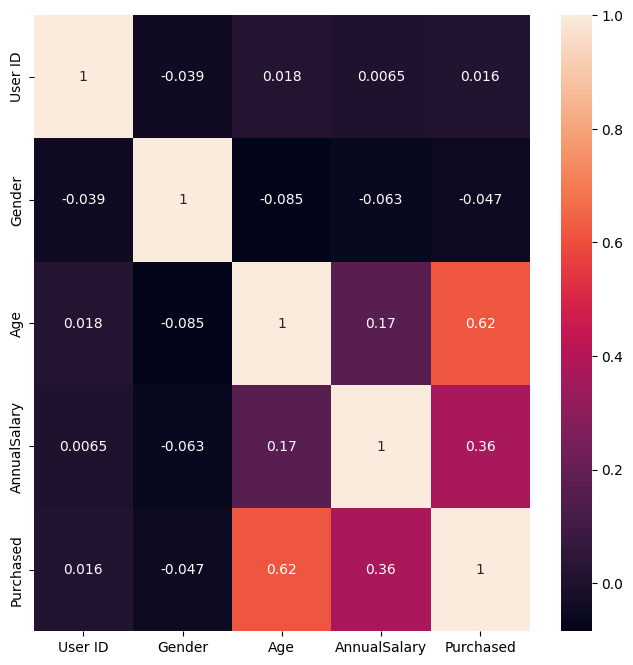

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot =True)

In [32]:
y = df['Purchased']
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [33]:

X =df.drop(columns =['Purchased'],axis =1)
X.head()

,User ID,Gender,Age,AnnualSalary
0,385,1,35,20000
1,681,1,40,43500
2,353,1,49,74000
3,895,1,40,107500
4,661,1,25,79000


In [34]:

from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()



In [35]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,User ID,Gender,Age,AnnualSalary
0,0.384384,1.0,0.377778,0.036364
1,0.680681,1.0,0.488889,0.207273
2,0.352352,1.0,0.688889,0.429091
3,0.894895,1.0,0.488889,0.672727
4,0.660661,1.0,0.155556,0.465455


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)


In [ ]:
X_train.shape

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE()

In [40]:
x_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [41]:
y_train.value_counts()

0    412
1    288
Name: Purchased, dtype: int64

In [42]:
y_train_smote.value_counts()

1    412
0    412
Name: Purchased, dtype: int64

In [63]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(criterion='entropy')

In [64]:
model2.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy')

In [66]:
r_y_predict = model2.predict(X_test)
r_y_predict_train = model2.predict(x_train_smote)

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Testing Accuracy = ', accuracy_score(y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(y_train_smote,r_y_predict_train))

Testing Accuracy =  0.8733333333333333
Training Accuracy =  1.0


In [73]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [74]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [75]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = model2, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [76]:
rf_Grid.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [77]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 33}

In [78]:
print (f'Train Accuracy - : {rf_Grid.score(x_train_smote,y_train_smote):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.925
Test Accuracy - : 0.887


In [79]:
model2.predict([[681,1,40,43500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [80]:
import pickle

In [81]:
pickle.dump(model2,open('car_purchase.pkl','wb'))